<a href="https://colab.research.google.com/github/Tiara-la/stacking-p2p-lending/blob/main/FIXX%20onPPdaiExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# **Data Collecting**

In [ ]:
#untuk membaca file

df = pd.read_csv ("/content/ppdaiData.csv")

In [ ]:
#untuk menampilkan data
df

,sex,occupation,education,marriage,household,income,outcome,income_tm,outcome_tm,tm_encode_3,...,cash_limit,repay_state,browse_data,loan_time,time,yu_e,yu_e_categery,yu_e_tm,yu_e_tm_categery,label
0,1,2,3,1,3,13.734079,13.255397,5.900126e+09,5.900935e+09,0.000000e+00,...,0.000000,0.0,0.0,5914855887,5.914856e+09,0.478681,1.0,-8.094010e+05,3.0,0
1,1,2,3,2,1,0.000000,0.000000,0.000000e+00,0.000000e+00,5.659685e+09,...,7.087560,0.0,151500.0,5914855887,2.551708e+08,0.000000,2.0,0.000000e+00,2.0,0
2,1,4,4,1,4,13.249264,9.834236,4.767557e+09,5.899778e+09,0.000000e+00,...,0.000000,0.0,38586.0,5914855887,5.914856e+09,3.415028,1.0,-1.132222e+09,3.0,0
3,1,4,4,3,2,12.128566,10.920132,5.042088e+09,5.902715e+09,5.912412e+09,...,7.808445,0.0,38764.0,5914855887,2.443522e+06,1.208435,1.0,-8.606264e+08,3.0,1
4,1,2,2,3,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,19.971271,0.0,0.0,5914855887,5.914856e+09,0.000000,2.0,0.000000e+00,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,1,2,3,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.937622e+09,...,12.357302,0.0,46890.0,5932135887,-5.486400e+06,0.000000,2.0,0.000000e+00,2.0,0
55592,1,4,2,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.907957e+09,...,7.284420,0.0,19600.0,5932135887,2.417882e+07,0.000000,2.0,0.000000e+00,2.0,1
55593,1,2,4,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.918528e+09,...,8.948062,0.0,104040.0,5932135887,1.360766e+07,0.000000,2.0,0.000000e+00,2.0,0
55594,1,2,3,3,4,0.000000,0.000000,0.000000e+00,0.000000e+00,4.227085e+09,...,9.277013,0.0,70720.0,5932135887,1.705051e+09,0.000000,2.0,0.000000e+00,2.0,0


# **Exploratory Data Analysis**

In [ ]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10149 entries, 5610 to 55595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  10149 non-null  int64  
 1   occupation           10149 non-null  int64  
 2   education            10149 non-null  int64  
 3   marriage             10149 non-null  int64  
 4   household            10149 non-null  int64  
 5   income               10149 non-null  float64
 6   outcome              10149 non-null  float64
 7   income_tm            10149 non-null  float64
 8   outcome_tm           10149 non-null  float64
 9   tm_encode_3          10149 non-null  float64
 10  prior_account        10149 non-null  float64
 11  prior_repay          10149 non-null  float64
 12  credit_limit         10149 non-null  float64
 13  account_balance      10149 non-null  float64
 14  minimun_repay        10149 non-null  float64
 15  consume_count        10149 non-nu

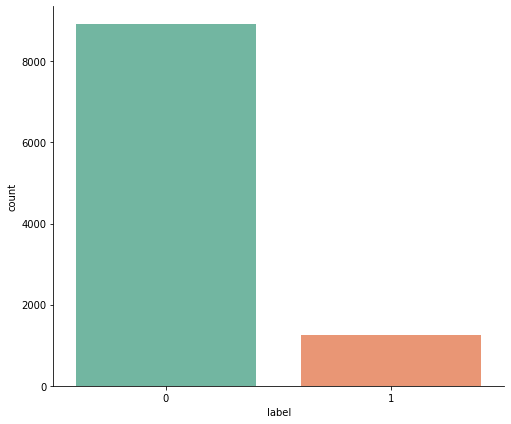

In [ ]:
sns.catplot(kind='count',x='label',height=6, aspect=1.2,data=df,palette='Set2')
plt.show()

<AxesSubplot:>

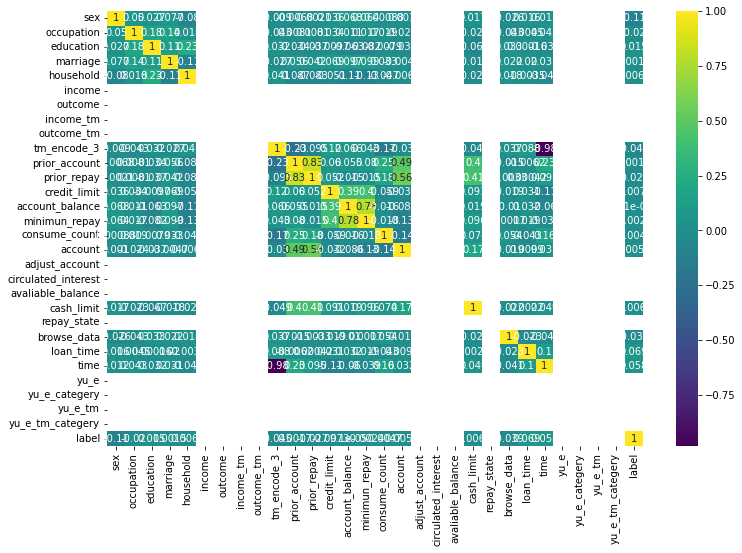

In [ ]:
# corelation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

loan_status_description memiliki korelasi baik dengan days_past_due; installment dengan principal_paid; amount_borrowed dengan principal_paid dan interest_paid; installment dengan principal_paid

In [ ]:
df.describe()

,sex,occupation,education,marriage,household,income,outcome,income_tm,outcome_tm,tm_encode_3,...,cash_limit,repay_state,browse_data,loan_time,time,yu_e,yu_e_categery,yu_e_tm,yu_e_tm_categery,label
count,10149.000000,10149.000000,10149.000000,10149.000000,10149.000000,10149.0,10149.0,10149.0,10149.0,1.014900e+04,...,10149.000000,10149.0,10149.000000,1.014900e+04,1.014900e+04,10149.0,10149.0,10149.0,10149.0,10149.000000
mean,1.139915,2.418465,3.298059,2.004927,2.365061,0.0,0.0,0.0,0.0,5.922677e+09,...,11.238167,0.0,23546.791802,5.929017e+09,6.340018e+06,0.0,2.0,0.0,2.0,0.122475
std,0.431938,0.781120,0.762711,1.001170,1.190077,0.0,0.0,0.0,0.0,1.073692e+07,...,8.390058,0.0,22414.588682,2.014887e+06,1.074911e+07,0.0,0.0,0.0,0.0,0.327850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.889020e+09,...,0.000000,0.0,0.000000,5.922977e+09,-1.537920e+07,0.0,2.0,0.0,2.0,0.000000
25%,1.000000,2.000000,3.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,5.916027e+09,...,0.000000,0.0,4262.000000,5.927557e+09,-1.302880e+06,0.0,2.0,0.0,2.0,0.000000
50%,1.000000,2.000000,3.000000,2.000000,2.000000,0.0,0.0,0.0,0.0,5.926261e+09,...,12.998218,0.0,17176.000000,5.929371e+09,2.764800e+06,0.0,2.0,0.0,2.0,0.000000
75%,1.000000,3.000000,4.000000,3.000000,4.000000,0.0,0.0,0.0,0.0,5.930625e+09,...,19.290638,0.0,36804.000000,5.930667e+09,1.283349e+07,0.0,2.0,0.0,2.0,0.000000
max,2.000000,4.000000,4.000000,5.000000,4.000000,0.0,0.0,0.0,0.0,5.939992e+09,...,22.967003,0.0,89765.000000,5.932136e+09,3.499200e+07,0.0,2.0,0.0,2.0,1.000000


# **Preprocessing Data**

## **Data Cleaning: Missing Value Check**

In [ ]:
# preprocessing data
# cek mising value
df.isnull().sum() 

sex                    0
occupation             0
education              0
marriage               0
household              0
income                 0
outcome                0
income_tm              0
outcome_tm             0
tm_encode_3            0
prior_account          0
prior_repay            0
credit_limit           0
account_balance        0
minimun_repay          0
consume_count          0
account                0
adjust_account         0
circulated_interest    0
avaliable_balance      0
cash_limit             0
repay_state            0
browse_data            0
loan_time              0
time                   0
yu_e                   0
yu_e_categery          0
yu_e_tm                0
yu_e_tm_categery       0
label                  0
dtype: int64

Tidak ada missing value pada data

## **Cleaning Data: Outliers Check**

### **income**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


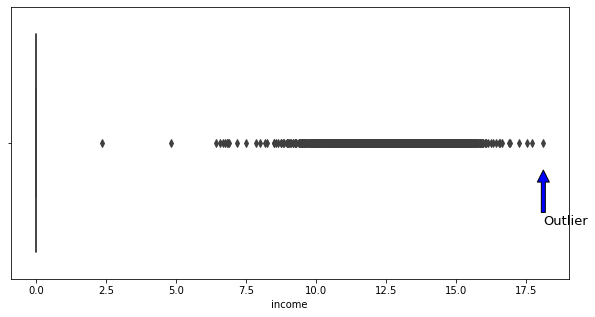

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['income'])
plt.annotate('Outlier', (df['income'].describe()['max'],0.1), xytext = (df['income'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['income'].describe()['75%'] - df['income'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['income'] < (Q1-1.5*IQR)) | (df['income'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (46303, 30)


### **tm_encode_3**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


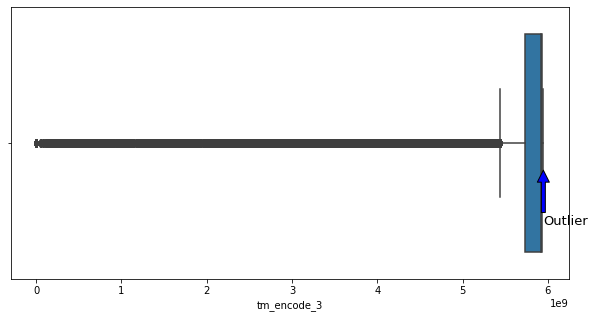

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['tm_encode_3'])
plt.annotate('Outlier', (df['tm_encode_3'].describe()['max'],0.1), xytext = (df['tm_encode_3'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['tm_encode_3'].describe()['75%'] - df['tm_encode_3'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['tm_encode_3'].quantile(0.25)
Q3 = df['tm_encode_3'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['tm_encode_3'] < (Q1-1.5*IQR)) | (df['tm_encode_3'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (35663, 30)


### **prior_account**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


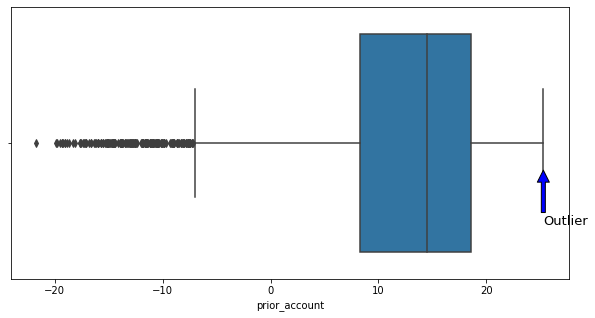

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['prior_account'])
plt.annotate('Outlier', (df['prior_account'].describe()['max'],0.1), xytext = (df['prior_account'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['prior_account'].describe()['75%'] - df['prior_account'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['prior_account'].quantile(0.25)
Q3 = df['prior_account'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['prior_account'] < (Q1-1.5*IQR)) | (df['prior_account'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (35480, 30)


### **credit_limit**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


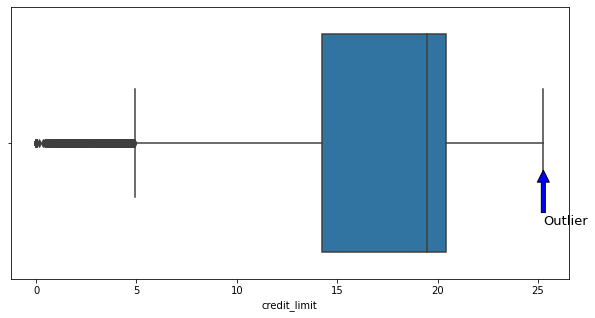

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['credit_limit'])
plt.annotate('Outlier', (df['credit_limit'].describe()['max'],0.1), xytext = (df['credit_limit'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['credit_limit'].describe()['75%'] - df['credit_limit'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['credit_limit'].quantile(0.25)
Q3 = df['credit_limit'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['credit_limit'] < (Q1-1.5*IQR)) | (df['credit_limit'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (32283, 30)


### **account_balance**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


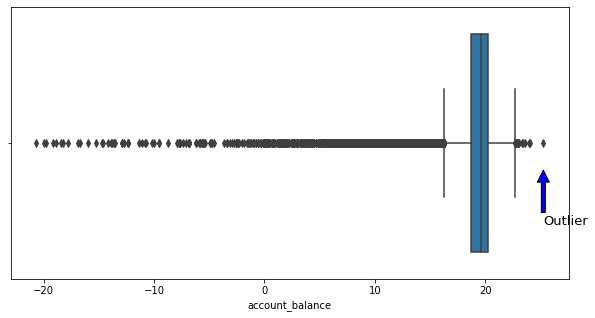

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['account_balance'])
plt.annotate('Outlier', (df['account_balance'].describe()['max'],0.1), xytext = (df['account_balance'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['account_balance'].describe()['75%'] - df['account_balance'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['account_balance'].quantile(0.25)
Q3 = df['account_balance'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['account_balance'] < (Q1-1.5*IQR)) | (df['account_balance'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (29159, 30)


### **minimun_repay**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


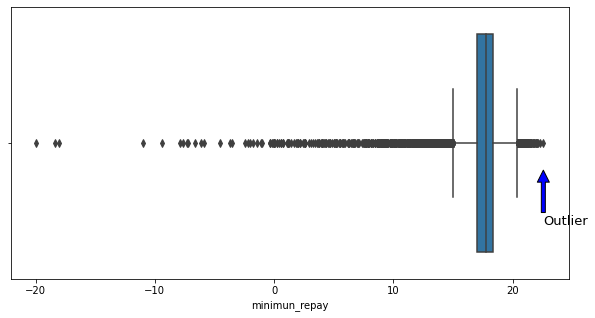

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['minimun_repay'])
plt.annotate('Outlier', (df['minimun_repay'].describe()['max'],0.1), xytext = (df['minimun_repay'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['minimun_repay'].describe()['75%'] - df['minimun_repay'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['minimun_repay'].quantile(0.25)
Q3 = df['minimun_repay'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['minimun_repay'] < (Q1-1.5*IQR)) | (df['minimun_repay'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (28157, 30)


### **consume_count**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


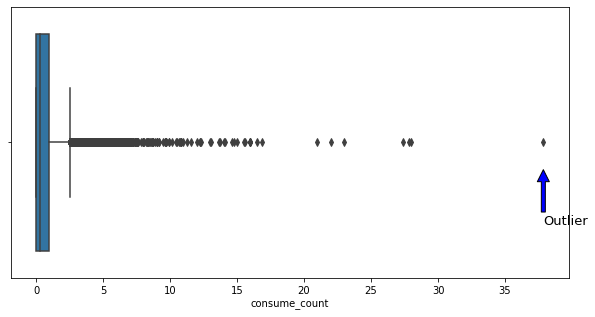

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['consume_count'])
plt.annotate('Outlier', (df['consume_count'].describe()['max'],0.1), xytext = (df['consume_count'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['consume_count'].describe()['75%'] - df['consume_count'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['consume_count'].quantile(0.25)
Q3 = df['consume_count'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['consume_count'] < (Q1-1.5*IQR)) | (df['consume_count'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (26570, 30)


### **adjust_account**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


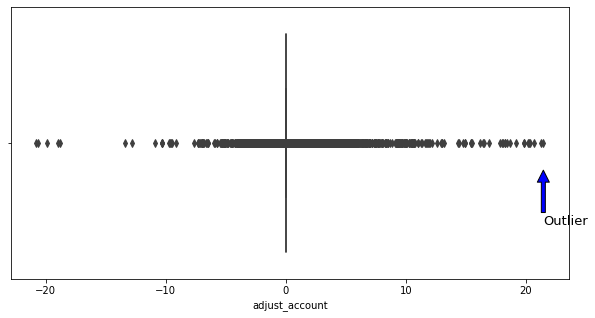

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['adjust_account'])
plt.annotate('Outlier', (df['adjust_account'].describe()['max'],0.1), xytext = (df['adjust_account'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['adjust_account'].describe()['75%'] - df['adjust_account'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['adjust_account'].quantile(0.25)
Q3 = df['adjust_account'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['adjust_account'] < (Q1-1.5*IQR)) | (df['adjust_account'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (22564, 30)


### **circulated_interest**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


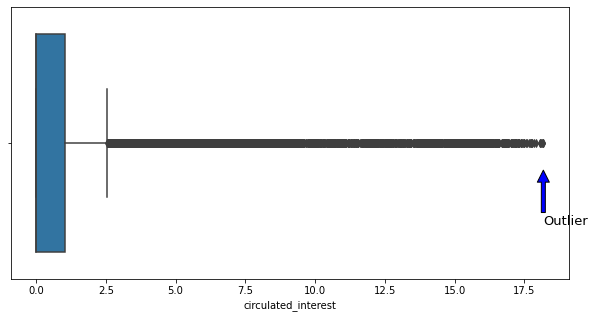

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['circulated_interest'])
plt.annotate('Outlier', (df['circulated_interest'].describe()['max'],0.1), xytext = (df['circulated_interest'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['circulated_interest'].describe()['75%'] - df['circulated_interest'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['circulated_interest'].quantile(0.25)
Q3 = df['circulated_interest'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['circulated_interest'] < (Q1-1.5*IQR)) | (df['circulated_interest'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (18227, 30)


### **avaliable_balance**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


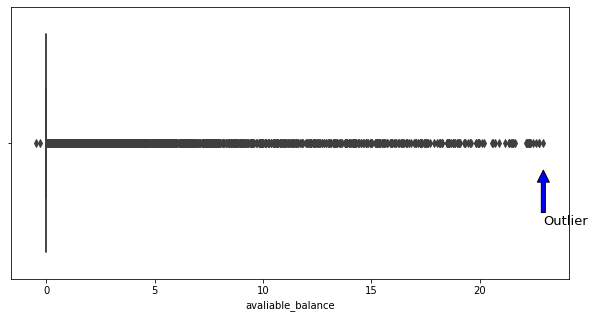

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['avaliable_balance'])
plt.annotate('Outlier', (df['avaliable_balance'].describe()['max'],0.1), xytext = (df['avaliable_balance'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['avaliable_balance'].describe()['75%'] - df['avaliable_balance'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['avaliable_balance'].quantile(0.25)
Q3 = df['avaliable_balance'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['avaliable_balance'] < (Q1-1.5*IQR)) | (df['avaliable_balance'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (16630, 30)


### **repay_state**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


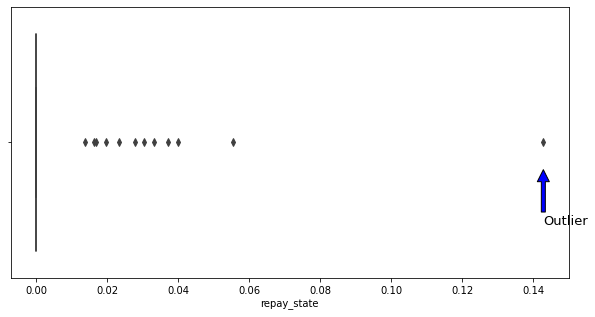

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['repay_state'])
plt.annotate('Outlier', (df['repay_state'].describe()['max'],0.1), xytext = (df['repay_state'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['repay_state'].describe()['75%'] - df['repay_state'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['repay_state'].quantile(0.25)
Q3 = df['repay_state'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['repay_state'] < (Q1-1.5*IQR)) | (df['repay_state'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (16618, 30)


### **browse_data**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


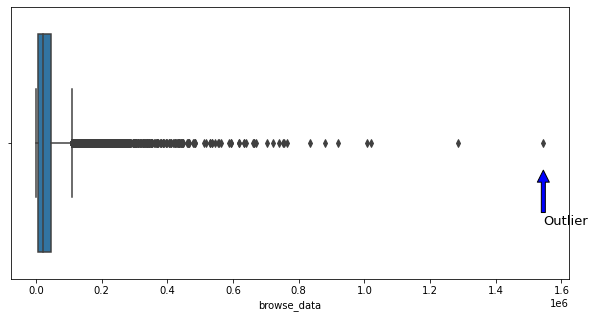

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['browse_data'])
plt.annotate('Outlier', (df['browse_data'].describe()['max'],0.1), xytext = (df['browse_data'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['browse_data'].describe()['75%'] - df['browse_data'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['browse_data'].quantile(0.25)
Q3 = df['browse_data'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['browse_data'] < (Q1-1.5*IQR)) | (df['browse_data'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (15425, 30)


### **loan_time**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


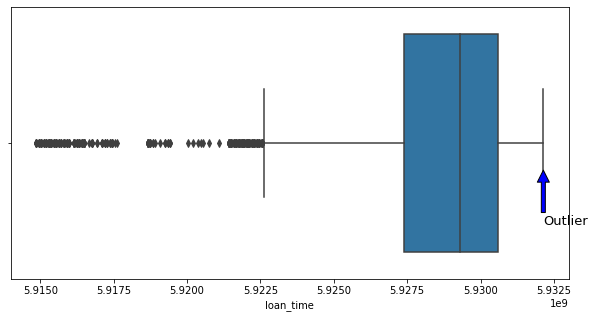

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['loan_time'])
plt.annotate('Outlier', (df['loan_time'].describe()['max'],0.1), xytext = (df['loan_time'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['loan_time'].describe()['75%'] - df['loan_time'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['loan_time'].quantile(0.25)
Q3 = df['loan_time'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['loan_time'] < (Q1-1.5*IQR)) | (df['loan_time'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (15024, 30)


### **time**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


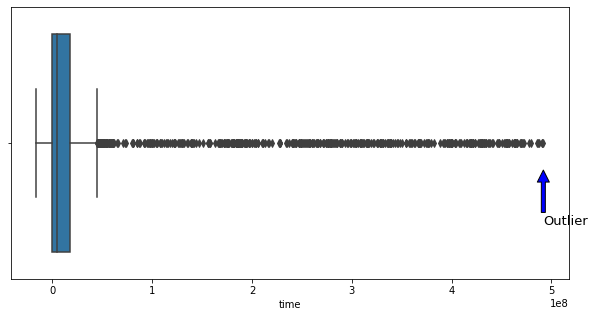

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['time'])
plt.annotate('Outlier', (df['time'].describe()['max'],0.1), xytext = (df['time'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['time'].describe()['75%'] - df['time'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['time'].quantile(0.25)
Q3 = df['time'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['time'] < (Q1-1.5*IQR)) | (df['time'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (14563, 30)


# **SMOTE**

In [ ]:
#over sampling data SMOTE
loan_data = df
X = loan_data.drop(['label'], axis=1)
y = loan_data['label']

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)

loan_datas = X_sm
loan_datas['label'] = y_sm

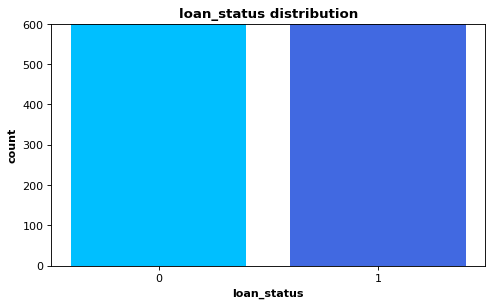

Data before over-sampling
0    12814
1     1749
Name: label, dtype: int64 

Data after over-sampling
0    12814
1    12814
Name: label, dtype: int64


In [ ]:
#melihat hasil dari Over Sampling SMOTE
import numpy as np
import matplotlib.pyplot as plt
height = y_sm.value_counts()
labels = ( '0', '1')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('loan_status distribution', fontweight='bold')
plt.xlabel('loan_status', fontweight='bold')
plt.ylabel('count', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

print("Data before over-sampling")
print(df['label'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_datas['label'].value_counts())

In [ ]:
loan_datas

,sex,occupation,education,marriage,household,income,outcome,income_tm,outcome_tm,tm_encode_3,...,cash_limit,repay_state,browse_data,loan_time,time,yu_e,yu_e_categery,yu_e_tm,yu_e_tm_categery,label
0,1,2,3,1,1,0.0,0.0,0.0,0.0,5.933110e+09,...,0.000000,0.0,55648.000000,5922631887,-1.047790e+07,0.0,2.0,0.0,2.0,0
1,1,2,3,1,1,0.0,0.0,0.0,0.0,5.930134e+09,...,8.661830,0.0,31093.000000,5922631887,-7.502342e+06,0.0,2.0,0.0,2.0,0
2,1,2,4,1,4,0.0,0.0,0.0,0.0,5.923676e+09,...,0.000000,0.0,26271.000000,5922631887,-1.043940e+06,0.0,2.0,0.0,2.0,0
3,1,2,4,2,4,0.0,0.0,0.0,0.0,5.933503e+09,...,0.000000,0.0,56656.000000,5922631887,-1.087067e+07,0.0,2.0,0.0,2.0,0
4,2,2,3,1,4,0.0,0.0,0.0,0.0,5.904154e+09,...,8.846101,0.0,38736.000000,5922631887,1.847743e+07,0.0,2.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25623,1,2,4,2,2,0.0,0.0,0.0,0.0,5.931488e+09,...,0.000000,0.0,56325.885570,5929444308,-2.043581e+06,0.0,2.0,0.0,2.0,1
25624,1,2,3,1,4,0.0,0.0,0.0,0.0,5.922477e+09,...,13.661284,0.0,17053.858971,5928724123,6.246838e+06,0.0,2.0,0.0,2.0,1
25625,1,2,2,1,4,0.0,0.0,0.0,0.0,5.900985e+09,...,18.217829,0.0,18504.254536,5925858156,2.487337e+07,0.0,2.0,0.0,2.0,1
25626,1,3,4,2,1,0.0,0.0,0.0,0.0,5.931424e+09,...,15.242790,0.0,17319.432685,5930971781,-4.523889e+05,0.0,2.0,0.0,2.0,1


# **Modelling**

In [ ]:
#import sklearn metric
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc)

In [ ]:
#confusion Metric
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

## **split**

In [ ]:
#split data
X=df.drop("label",axis=1)
y=df["label"]

In [ ]:
X

,sex,occupation,education,marriage,household,income,outcome,income_tm,outcome_tm,tm_encode_3,...,avaliable_balance,cash_limit,repay_state,browse_data,loan_time,time,yu_e,yu_e_categery,yu_e_tm,yu_e_tm_categery
5336,1,2,3,1,1,0.0,0.0,0.0,0.0,5.933110e+09,...,0.0,0.000000,0.0,55648.0,5922631887,-1.047790e+07,0.0,2.0,0.0,2.0
5338,1,2,3,1,1,0.0,0.0,0.0,0.0,5.930134e+09,...,0.0,8.661830,0.0,31093.0,5922631887,-7.502342e+06,0.0,2.0,0.0,2.0
5339,1,2,4,1,4,0.0,0.0,0.0,0.0,5.923676e+09,...,0.0,0.000000,0.0,26271.0,5922631887,-1.043940e+06,0.0,2.0,0.0,2.0
5351,1,2,4,2,4,0.0,0.0,0.0,0.0,5.933503e+09,...,0.0,0.000000,0.0,56656.0,5922631887,-1.087067e+07,0.0,2.0,0.0,2.0
5359,2,2,3,1,4,0.0,0.0,0.0,0.0,5.904154e+09,...,0.0,8.846101,0.0,38736.0,5922631887,1.847743e+07,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55581,1,3,4,2,2,0.0,0.0,0.0,0.0,5.934929e+09,...,0.0,21.069883,0.0,45765.0,5932135887,-2.793600e+06,0.0,2.0,0.0,2.0
55584,1,0,0,0,0,0.0,0.0,0.0,0.0,5.905179e+09,...,0.0,21.625197,0.0,16545.0,5932135887,2.695680e+07,0.0,2.0,0.0,2.0
55587,1,2,3,1,3,0.0,0.0,0.0,0.0,5.902382e+09,...,0.0,0.000000,0.0,68376.0,5932135887,2.975399e+07,0.0,2.0,0.0,2.0
55592,1,4,2,1,4,0.0,0.0,0.0,0.0,5.907957e+09,...,0.0,7.284420,0.0,19600.0,5932135887,2.417882e+07,0.0,2.0,0.0,2.0


## **Single Classifier**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf1 = XGBClassifier()
xgb = cross_val_score(clf1, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari XGBoost : {0:2%}". format(xgb[i,]))
print("Rata-rata Akurasi dari XGBoost :", xgb.mean())
print("Akurasi Terbaik: ", xgb.max())
y_pred = cross_val_predict(clf1, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari XGBoost : 17.401483%
Akurasi dari XGBoost : 40.187281%
Akurasi dari XGBoost : 62.504877%
Akurasi dari XGBoost : 57.042528%
Akurasi dari XGBoost : 53.804136%
Akurasi dari XGBoost : 54.311354%
Akurasi dari XGBoost : 58.759266%
Akurasi dari XGBoost : 57.081545%
Akurasi dari XGBoost : 52.498048%
Akurasi dari XGBoost : 51.639344%
Rata-rata Akurasi dari XGBoost : 0.5052298624239805
Akurasi Terbaik:  0.6250487709715178
Confusion Matrix:  [[ 1755 11059]
 [ 1621 11193]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf2 = RandomForestClassifier()
rf = cross_val_score(clf2, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari Random Forest : {0:2%}". format(rf[i,]))
print("Rata-rata Akurasi dari Random Forest :", rf.mean())
print("Akurasi Terbaik: ", rf.max())
y_pred = cross_val_predict(clf2, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari Random Forest : 87.068345%
Akurasi dari Random Forest : 85.773381%
Akurasi dari Random Forest : 69.604317%
Akurasi dari Random Forest : 59.748201%
Akurasi dari Random Forest : 82.841727%
Akurasi dari Random Forest : 84.154676%
Akurasi dari Random Forest : 81.273610%
Akurasi dari Random Forest : 87.245908%
Akurasi dari Random Forest : 86.976075%
Akurasi dari Random Forest : 87.119986%
Rata-rata Akurasi dari Random Forest : 0.8118062258234426
Akurasi Terbaik:  0.8724590753732686
Confusion Matrix:  [[44757  3656]
 [ 6817   366]]


In [ ]:
##fiixx
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = LGBMClassifier()
lgb = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari LightGBM : {0:2%}". format(lgb[i,]))
print("Rata-rata Akurasi dari LightGBM :", lgb.mean())
print("Akurasi Terbaik: ", lgb.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari LightGBM : 87.086331%
Akurasi dari LightGBM : 52.823741%
Akurasi dari LightGBM : 34.514388%
Akurasi dari LightGBM : 33.291367%
Akurasi dari LightGBM : 32.014388%
Akurasi dari LightGBM : 33.956835%
Akurasi dari LightGBM : 29.159921%
Akurasi dari LightGBM : 52.635366%
Akurasi dari LightGBM : 72.584997%
Akurasi dari LightGBM : 87.101997%
Rata-rata Akurasi dari LightGBM : 0.5151693313455011
Akurasi Terbaik:  0.8710199676200756
Confusion Matrix:  [[26824 21589]
 [ 5366  1817]]


In [ ]:
##fixxx
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf4 = DecisionTreeClassifier()
dt = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari Decision Tree : {0:2%}". format(dt[i,]))
print("Rata-rata Akurasi dari Decision Tree :", dt.mean())
print("Akurasi Terbaik: ", dt.max())
y_pred = cross_val_predict(clf4, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari Decision Tree : 86.133094%
Akurasi dari Decision Tree : 56.169065%
Akurasi dari Decision Tree : 40.557554%
Akurasi dari Decision Tree : 35.503597%
Akurasi dari Decision Tree : 46.996403%
Akurasi dari Decision Tree : 69.622302%
Akurasi dari Decision Tree : 71.307789%
Akurasi dari Decision Tree : 73.160640%
Akurasi dari Decision Tree : 76.542544%
Akurasi dari Decision Tree : 73.034718%
Rata-rata Akurasi dari Decision Tree : 0.6290277060596531
Akurasi Terbaik:  0.8613309352517986
Confusion Matrix:  [[33265 15148]
 [ 5630  1553]]


## **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier()),
]

clf6 = StackingClassifier(estimators=estimators, final_estimator = XGBClassifier())
stc = cross_val_score(clf6, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
y_pred = cross_val_predict(clf6, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 82.364417%
Akurasi dari STACKING : 90.479906%
Akurasi dari STACKING : 80.998829%
Akurasi dari STACKING : 87.943816%
Akurasi dari STACKING : 89.621537%
Akurasi dari STACKING : 89.699571%
Akurasi dari STACKING : 87.553648%
Akurasi dari STACKING : 87.748732%
Akurasi dari STACKING : 92.388759%
Akurasi dari STACKING : 85.909446%
Rata-rata Akurasi dari STACKING:  0.874708661024006
Akurasi Terbaik:  0.9238875878220141
Confusion Matrix:  [[10676  2138]
 [ 1095 11719]]


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier()),
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
y_pred = cross_val_predict(clf4, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 78.813890%
Akurasi dari STACKING : 88.841202%
Akurasi dari STACKING : 77.136169%
Akurasi dari STACKING : 86.500195%
Akurasi dari STACKING : 90.401873%
Akurasi dari STACKING : 90.674990%
Akurasi dari STACKING : 86.383145%
Akurasi dari STACKING : 86.734296%
Akurasi dari STACKING : 91.334895%
Akurasi dari STACKING : 87.587822%
Rata-rata Akurasi dari STACKING:  0.8644084755039515
Akurasi Terbaik:  0.9133489461358314
